In [1]:
exec('''import urllib; exec(urllib.request.urlopen('https://raw.githubusercontent.com/NickGMV/visual-tools/main/visual-aids-jupyter8.txt').read())''')

settings found initialising with personal preferences...
['126%', '125%', '#a2dde2', '#f9f9a9', '127%', '#f9f995', '#b521c0', '126%']


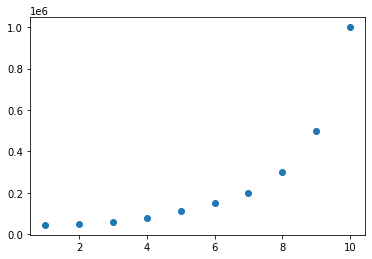

In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#check out the data 

data = pd.read_csv('./Position_Salaries.csv')

data.head()

plt.scatter(x =  data['Level'], y = data['Salary'])

In [ ]:
# looking at the plot this fits a curve with degree (2) because it looks like x^2 graph
# This makes it an ideal candidate for a polynomial regression

In [19]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

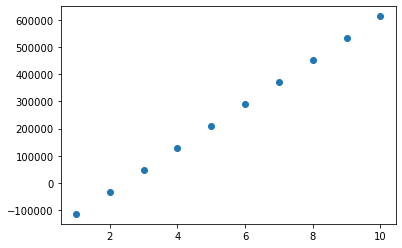

In [20]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Just to hammer it home plotting this linear regression it is clearly inadequate
y_pred = lin_reg.predict(X)
plt.scatter(X,y_pred)

In [31]:
# Training the Polynomial Regression model on the whole dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 12)

# this line fits the data in to polynomial features 
X_poly = poly_reg.fit_transform(X)

# this tranforms all colums by raising them to power [0,1,2 ...] whatever the degree is set to 
pd.DataFrame(X_poly)

# You could get an equivalent by creating these columns manually and training multiple linear regression

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03,2.048000e+03,4.096000e+03
2,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04,1.771470e+05,5.314410e+05
3,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06,4.194304e+06,1.677722e+07
4,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06,4.882812e+07,2.441406e+08
5,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07,3.627971e+08,2.176782e+09
6,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08,1.977327e+09,1.384129e+10
7,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09,8.589935e+09,6.871948e+10
8,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09,3.138106e+10,2.824295e+11
9,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10,1.000000e+11,1.000000e+12


In [32]:
# now train the model using the polynomially transformed features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

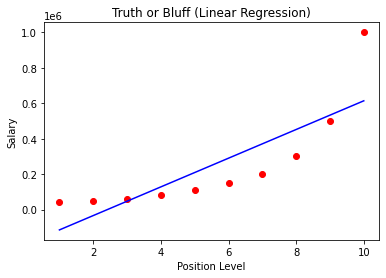

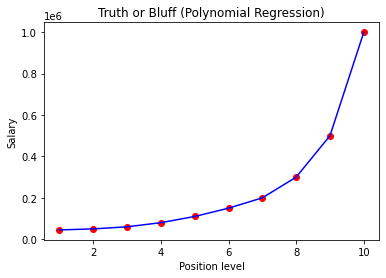

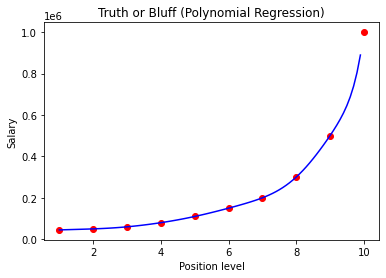

array([172815.91411996])

In [33]:

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression
lin_reg.predict([[6.5]])

# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

In [ ]:
# polynomial models are prone to overfitting if too many degrees are given,\
# in this case the data doesn't cause any issues as it has been engineered to conform to an x^2 curve 